Company 080b998a-8625-4e84-a82f-2d124f6eb55d
Mean absolute error (bins): 0.0
Mean absolute percentage error (bins): 0.0%
Mean absolute error (days): 1.4642857142857142
Mean absolute percentage error (days): 2.7421146711574758%


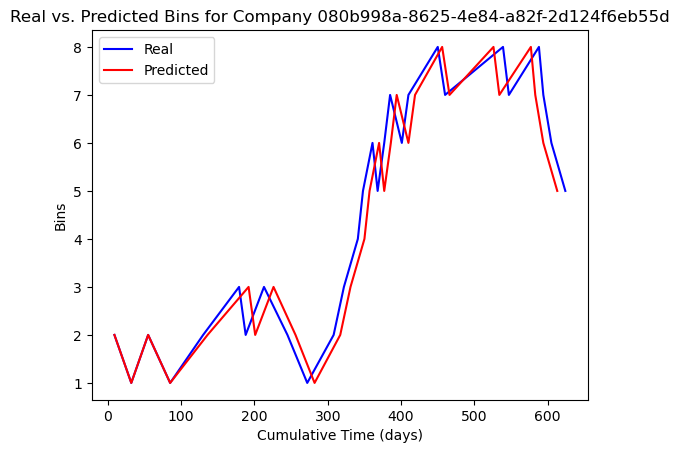

Company 0959d2b5-c474-423e-a8d8-b70a6f376d1c
Mean absolute error (bins): 0.0
Mean absolute percentage error (bins): 0.0%
Mean absolute error (days): 0.27586206896551724
Mean absolute percentage error (days): 0.8500400962309542%


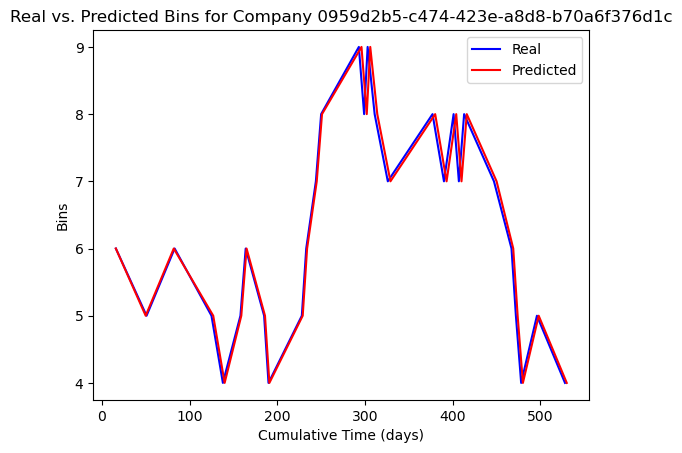

Company 10dbe3bc-3cf9-4001-856c-3ad53969f97f
Mean absolute error (bins): 0.058823529411764705
Mean absolute percentage error (bins): 0.65359477124183%
Mean absolute error (days): 0.6470588235294118
Mean absolute percentage error (days): 1.3814506641437267%


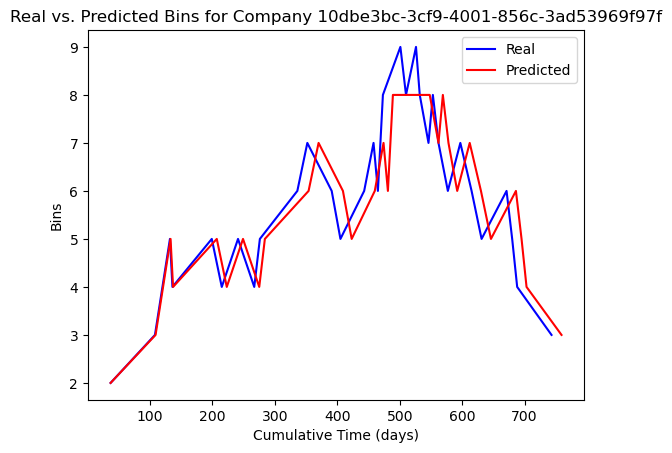

Company 1282e427-8971-44d3-a0e3-7d8da7527392
Mean absolute error (bins): 0.0
Mean absolute percentage error (bins): 0.0%
Mean absolute error (days): 0.5625
Mean absolute percentage error (days): 1.214703172911959%


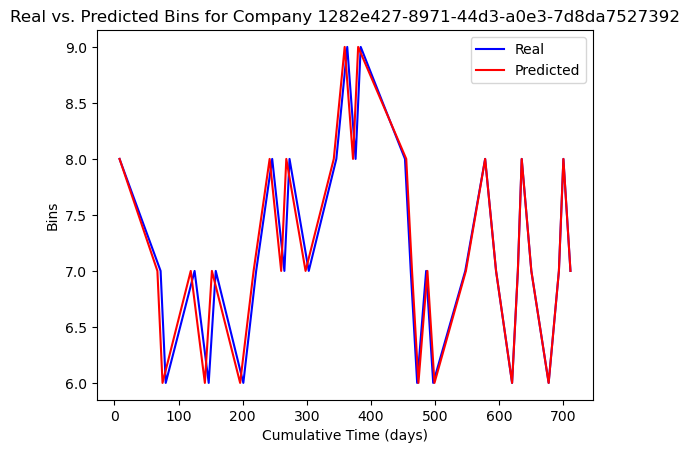

Company 131af5bc-8337-4c86-a8ed-e7deaa35d923
Mean absolute error (bins): 0.0
Mean absolute percentage error (bins): 0.0%
Mean absolute error (days): 1.4166666666666667
Mean absolute percentage error (days): 2.7784026425330772%


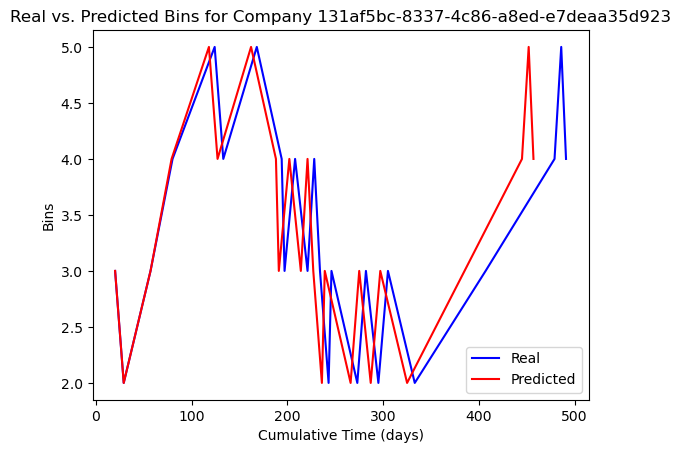

Company 1586e716-a9a4-44de-a669-08adb1647127
Mean absolute error (bins): 0.15
Mean absolute percentage error (bins): 15.0%
Mean absolute error (days): 12.433333333333334
Mean absolute percentage error (days): 3.2797083316519817%


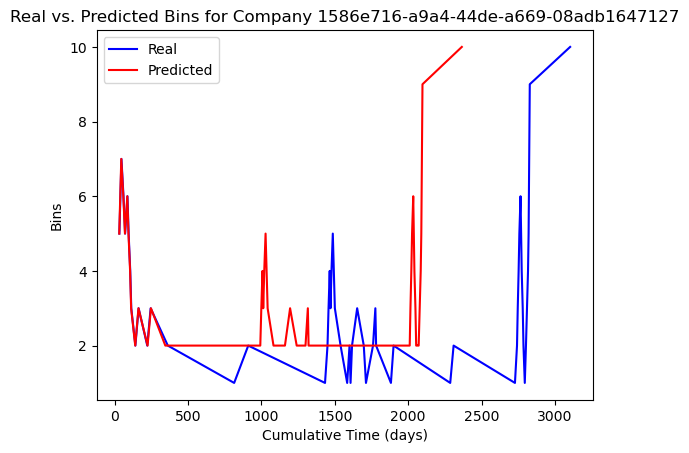

Company 204fe856-da52-48f7-b9cb-2ecf13c2d490
Mean absolute error (bins): 0.0
Mean absolute percentage error (bins): 0.0%
Mean absolute error (days): 6.333333333333333
Mean absolute percentage error (days): 2.1487196456773257%


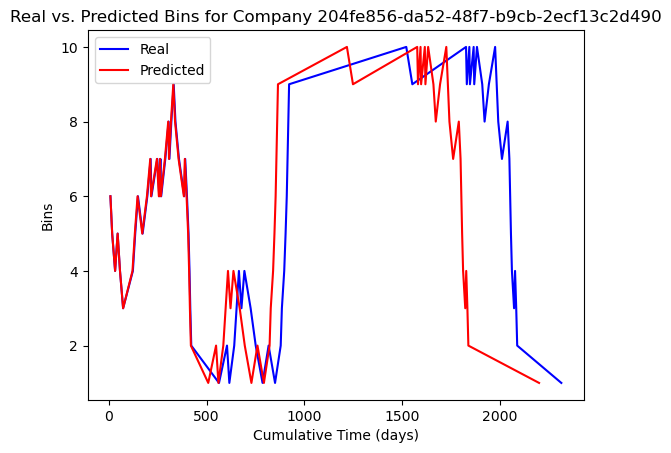

Company 24ad6818-6667-4c92-b598-bf150f6c8a53
Mean absolute error (bins): 0.1111111111111111
Mean absolute percentage error (bins): 2.7777777777777777%
Mean absolute error (days): 1.0
Mean absolute percentage error (days): 7.365738318119271%


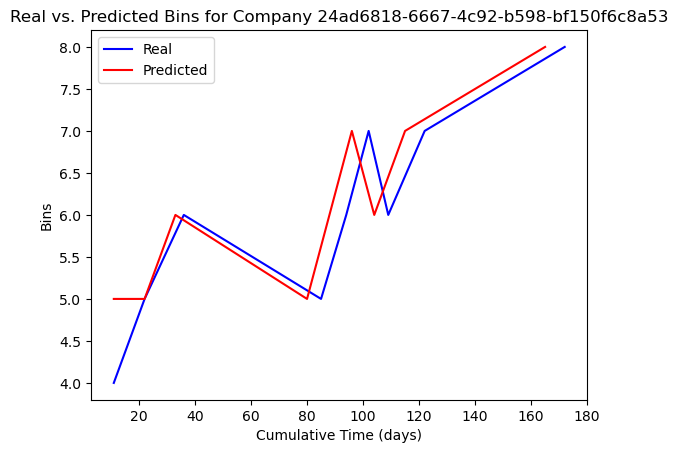

Company 26bc64a2-2165-4750-9333-31e15d814a3e
Mean absolute error (bins): 0.16666666666666666
Mean absolute percentage error (bins): 2.0238095238095237%
Mean absolute error (days): 13.25
Mean absolute percentage error (days): 12.846035543403964%


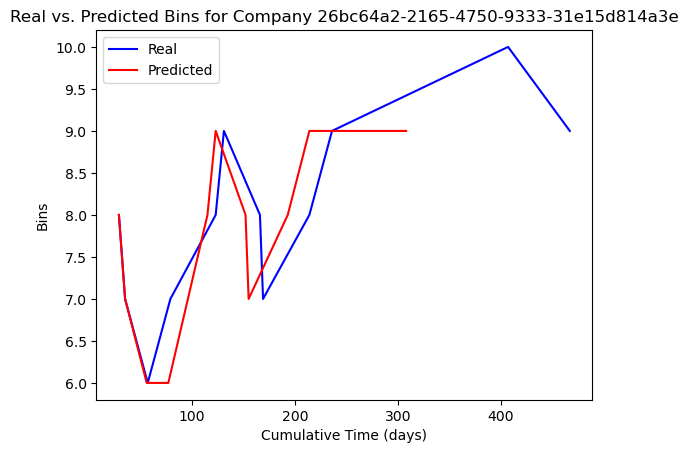

Company 2c06ab56-5272-42a3-878a-b2393cc44153
Mean absolute error (bins): 0.0
Mean absolute percentage error (bins): 0.0%
Mean absolute error (days): 19.06896551724138
Mean absolute percentage error (days): 5.448054473034386%


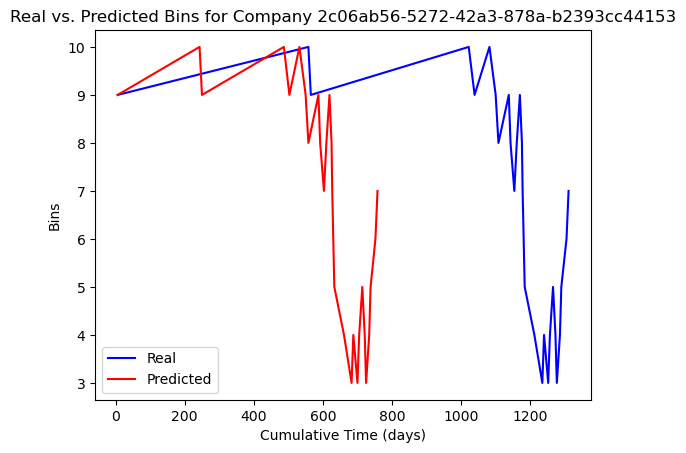

Company 30798910-0baf-43ff-b041-5326751ef05d
Mean absolute error (bins): 0.0
Mean absolute percentage error (bins): 0.0%
Mean absolute error (days): 0.3235294117647059
Mean absolute percentage error (days): 0.6774442007167475%


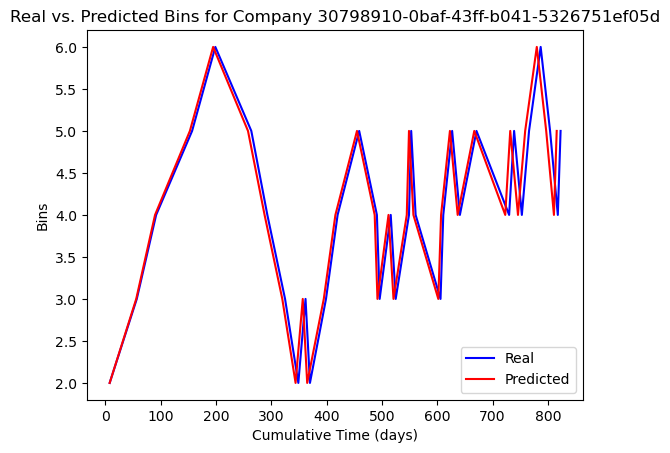

Company 39a9b1f6-2b5d-4a09-84d4-0865308edb55
Mean absolute error (bins): 0.0
Mean absolute percentage error (bins): 0.0%
Mean absolute error (days): 0.8
Mean absolute percentage error (days): 3.1826929659746996%


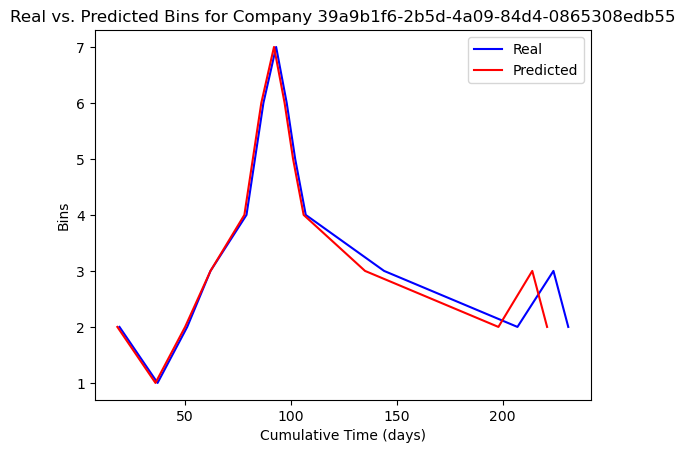

Company 3cd814a4-acb0-40f0-ab7b-e13a3b7c2dab
Mean absolute error (bins): 0.0
Mean absolute percentage error (bins): 0.0%
Mean absolute error (days): 1.6527777777777777
Mean absolute percentage error (days): 5.975253176868954%


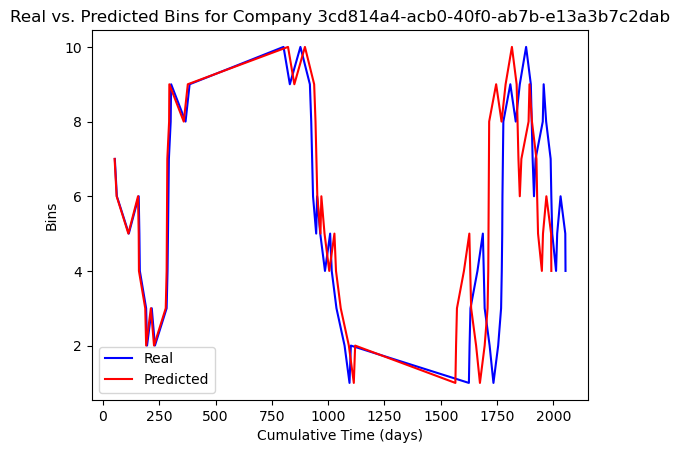

Company 3e31e41a-8950-4f97-901e-0d069ce50a05
Mean absolute error (bins): 0.0
Mean absolute percentage error (bins): 0.0%
Mean absolute error (days): 1.0
Mean absolute percentage error (days): 19.022108843537413%


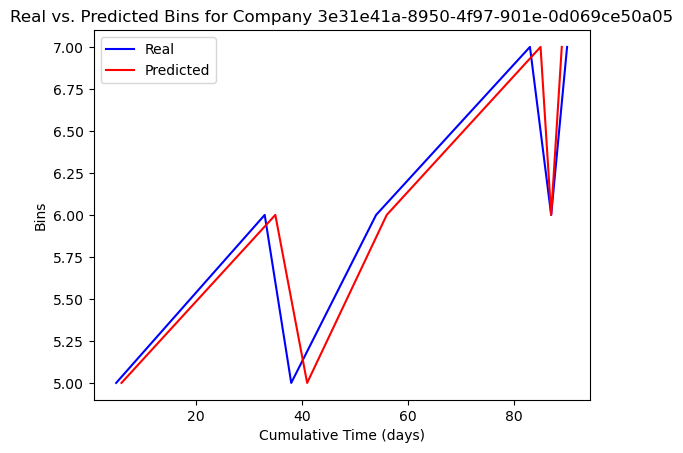

Company 4177dd28-059d-493d-a2ba-1e2d4c55b155
Mean absolute error (bins): 0.0
Mean absolute percentage error (bins): 0.0%
Mean absolute error (days): 3.3846153846153846
Mean absolute percentage error (days): 7.799873497274569%


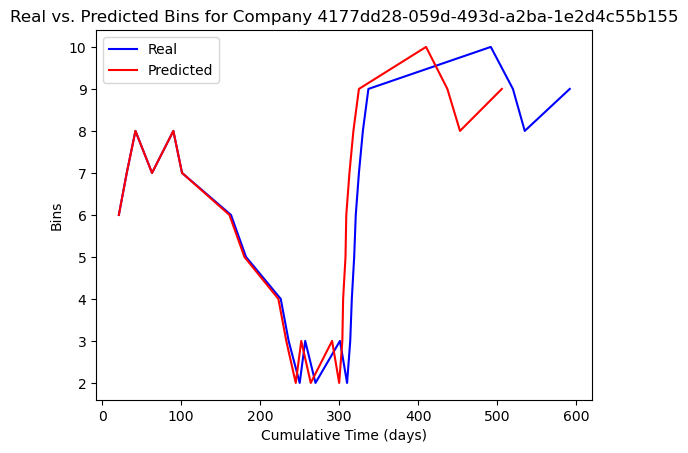

Company 480dc899-3b50-4ce3-9e4c-a7c9eafc8248
Mean absolute error (bins): 0.10714285714285714
Mean absolute percentage error (bins): 1.0714285714285716%
Mean absolute error (days): 7.25
Mean absolute percentage error (days): 13.295107977575462%


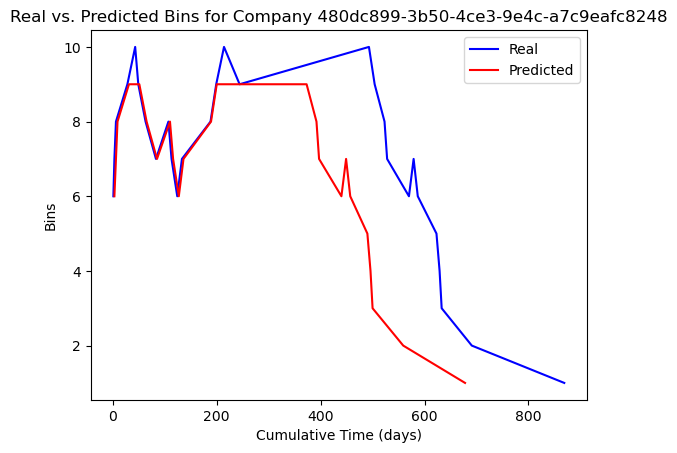

In [14]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Import data from CSV
data = pd.read_csv('Final-data-with-bins-days-R1.csv', header=None, names=['Date', 'Company', 'Bin', 'Days'])  
# Select the first 20 company IDs
unique_company_ids = data['Company'].unique()[:20]

# Initialize lists to store MAE and MAPE values for all companies
mae_bins_all = []
mape_bins_all = []
mae_days_all = []
mape_days_all = []

for company_id in unique_company_ids:
    company_data = data[data['Company'] == company_id]

    # Sort the data by date
    company_data = company_data.sort_values(by='Date')
    company_data.reset_index(drop=True, inplace=True)

    # Prepare the input features and targets for training and testing
    X = company_data[['Bin', 'Days']].values
    y_bin = company_data['Bin'].values
    y_days = company_data['Days'].values

    n = len(company_data)
    if n < 15:  # Not enough data for training and testing
        continue

    # Split data into training and testing sets chronologically
    n_train = int(n * 0.7)
    X_train, X_test = X[:n_train], X[n_train:]
    y_bin_train, y_bin_test = y_bin[:n_train], y_bin[n_train:]
    y_days_train, y_days_test = y_days[:n_train], y_days[n_train:]

    # Train a GradientBoostingRegressor model for bins
    model_bin = GradientBoostingRegressor(n_estimators=100, random_state=42)
    model_bin.fit(X_train, y_bin_train)

    # Train a GradientBoostingRegressor model for days
    model_days = GradientBoostingRegressor(n_estimators=100, random_state=42)
    model_days.fit(X_train, y_days_train)

    # Make predictions using the testing set
    y_pred_bin = model_bin.predict(X_test)
    y_pred_days = model_days.predict(X_test)

    # Round the predicted bins and days to the nearest integers
    predicted_bins = np.round(y_pred_bin).astype(int)
    predicted_days = np.round(y_pred_days).astype(int)

    # Calculate the cumulative time for real and predicted values
    cumulative_time_real = np.cumsum(y_days_test)
    cumulative_time_predicted = np.cumsum(predicted_days)
    
    # Calculate MAE and MAPE
    mae_bin = mean_absolute_error(y_bin_test, predicted_bins)
    mape_bin = mean_absolute_percentage_error(y_bin_test, predicted_bins)
    mae_days = mean_absolute_error(y_days_test, predicted_days)
    mape_days = mean_absolute_percentage_error(y_days_test, predicted_days)
    
    # Store the MAE and MAPE values in the lists
    mae_bins_all.append(mae_bin)
    mape_bins_all.append(mape_bin)
    mae_days_all.append(mae_days)
    mape_days_all.append(mape_days)

    print(f"Company {company_id}")
    print(f"Mean absolute error (bins): {mae_bin}")
    print(f"Mean absolute percentage error (bins): {mape_bin * 100}%")
    print(f"Mean absolute error (days): {mae_days}")
    print(f"Mean absolute percentage error (days): {mape_days * 100}%")

    # Create the plot
    fig, ax = plt.subplots()

    # Plot the real values
    ax.plot(cumulative_time_real, y_bin_test, label='Real', color='blue')

    # Plot the predicted values
    ax.plot(cumulative_time_predicted, predicted_bins, label='Predicted', color='red')

    # Set labels and title for the plot
    ax.set_xlabel('Cumulative Time (days)')
    ax.set_ylabel('Bins')
    ax.set_title(f'Real vs. Predicted Bins for Company {company_id}')
    ax.legend()

    # Show the plot
    plt.show()


In [2]:
#R1
mean_mae_bins = np.mean(mae_bins_all)
mean_mape_bins = np.mean(mape_bins_all)
mean_mae_days = np.mean(mae_days_all)
mean_mape_days = np.mean(mape_days_all)

print(f"Average MAE for bins: {mean_mae_bins}")
print(f"Average MAPE for bins: {mean_mape_bins * 100}%")
print(f"Average MAE for days: {mean_mae_days}")
print(f"Average MAPE for days: {mean_mape_days * 100}%")

Average MAE for bins: 0.014740534233374436
Average MAPE for bins: 0.5598274636075057%
Average MAE for days: 2.4300304897901426
Average MAPE for days: 3.2590592375063245%


In [7]:
#R2
mean_mae_bins = np.mean(mae_bins_all)
mean_mape_bins = np.mean(mape_bins_all)
mean_mae_days = np.mean(mae_days_all)
mean_mape_days = np.mean(mape_days_all)

print(f"Average MAE for bins: {mean_mae_bins}")
print(f"Average MAPE for bins: {mean_mape_bins * 100}%")
print(f"Average MAE for days: {mean_mae_days}")
print(f"Average MAPE for days: {mean_mape_days * 100}%")

Average MAE for bins: 0.025241048800432413
Average MAPE for bins: 0.9714871804121027%
Average MAE for days: 3.594489656952463
Average MAPE for days: 4.603822656982325%


In [9]:
#R3
mean_mae_bins = np.mean(mae_bins_all)
mean_mape_bins = np.mean(mape_bins_all)
mean_mae_days = np.mean(mae_days_all)
mean_mape_days = np.mean(mape_days_all)

print(f"Average MAE for bins: {mean_mae_bins}")
print(f"Average MAPE for bins: {mean_mape_bins * 100}%")
print(f"Average MAE for days: {mean_mae_days}")
print(f"Average MAPE for days: {mean_mape_days * 100}%")

Average MAE for bins: 0.03717911766943893
Average MAPE for bins: 1.340324998619852%
Average MAE for days: 5.312658291276459
Average MAPE for days: 6.957370683871067%


In [11]:
#R4
mean_mae_bins = np.mean(mae_bins_all)
mean_mape_bins = np.mean(mape_bins_all)
mean_mae_days = np.mean(mae_days_all)
mean_mape_days = np.mean(mape_days_all)

print(f"Average MAE for bins: {mean_mae_bins}")
print(f"Average MAPE for bins: {mean_mape_bins * 100}%")
print(f"Average MAE for days: {mean_mae_days}")
print(f"Average MAPE for days: {mean_mape_days * 100}%")

Average MAE for bins: 0.036716288236445974
Average MAPE for bins: 1.4462719290236175%
Average MAE for days: 6.712362377078951
Average MAPE for days: 7.9575509790070535%


In [13]:
#R5
mean_mae_bins = np.mean(mae_bins_all)
mean_mape_bins = np.mean(mape_bins_all)
mean_mae_days = np.mean(mae_days_all)
mean_mape_days = np.mean(mape_days_all)

print(f"Average MAE for bins: {mean_mae_bins}")
print(f"Average MAPE for bins: {mean_mape_bins * 100}%")
print(f"Average MAE for days: {mean_mae_days}")
print(f"Average MAPE for days: {mean_mape_days * 100}%")

Average MAE for bins: 0.0873936023311698
Average MAPE for bins: 3.2127822852570107%
Average MAE for days: 13.44475673486353
Average MAPE for days: 18.173405627356427%
